# Component parameter files
Component parameters can be loaded from file (.toml format) rather than specifiying them in code when building a system. This enables a component library to be created from .toml files. This notebook demonstrates the component parameter files for each of the component types in `sysLoss`.

In [1]:
# This cell can be removed, it is only used for running the notebook during Sphinx documentation build.
import sys, os
if os.getcwd().replace('\\', '/').endswith("/docs/nb"):
    sys.path.insert(0, os.path.abspath(os.path.join("../../src")))

Import packages:

In [2]:
from sysloss.components import *
from sysloss.system import System
import toml

## About the .toml format
The general format of a component parameter file consists of two tables:
  * \[\<component type\>] 
    * component specific parameters
  * \[limits] (optional)
    * limits for input and output voltages, currents, power, loss and temperature

`sysLoss` will silently ignore surplus parameters in the .toml file. Parameter files for each of the component types are detailed below.
```{tip}
TOML is picky on array values - a mix of integer and floating point values are not allowed. Always use floats!  
```

### Limit definitions
The following limits are supported:
  * "vi": Input voltage (V)
  * "vo": Output voltage (V)
  * "vd": Voltage difference, vi - vo (V)
  * "ii": Input current (A)
  * "io": Output current (A)
  * "pi": Input power (W)
  * "po": Output power (W)
  * "pl": Power loss (W)
  * "tr": Temperature rise (°C)
  * "tp": Peak temperature (°C)

Some components only support a subset of the limits.

## Source

In [3]:
source_params = """[source]
vo = 3.3   # output voltage (V), mandatory
rs = 0.007 # series resistance (Ohm), optional

[limits] # optional, any combination of below parameters can be specificed
io = [ 0.0, 1.0]
po = [ 0.0, 1000000.0]
pl = [ 0.0, 1000000.0]
"""

with open("source.toml", "w") as f:
    f.write(source_params)

sys = System("Test toml", Source.from_file("V3.3", fname="source.toml"))
sys.add_source(Source("5V", vo=5.0))

## PMux

In [4]:
pmux_params = """[pmux]
rs = [0.33, 0.42, 0.15]
iis = 0.57e-6
rt = 5.3
[pmux.ig]
vi = [1.9, 5.8, 12.5]
io = [0.002, 0.02, 0.2]
ig = [[3.0e-6, 3.0e-6, 4.0e-6], [9.0e-6, 9.0e-6, 99.0e-6], [56.0e-6, 67.0e-6, 77.0e-6]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 16.0,]
vo = [ 0.0, 1000000.0,]
vd = [ 0.0, 1000000.0,]
ii = [ 0.0, 1000000.0,]
io = [ 0.0, 2.0,]
pi = [ 0.0, 1000000.0,]
po = [ 0.0, 1000000.0,]
pl = [ 0.0, 1000000.0,]
tr = [ 0.0, 1000000.0,]
tp = [ 0.0, 100.0,]
"""

with open("pmux.toml", "w") as f:
    f.write(pmux_params)

sys.add_comp(["V3.3", "5V"], comp=PMux.from_file("Pmux", fname="pmux.toml"), rail="Vsys")

## Converter

In [5]:
conv_params = """[converter]
vo = 2.5      # output voltage (V), mandatory
iq = 1.2e-6   # quiescent (no-load) current (A), optional
iis = 0.33e-6 # sleep (shut-down) current (A), optional
rt = 25.0     # thermal resistance (°C/W), optional
#eff = 0.87   # efficiency, mandatory
# efficiency can optionally be specified as 1D interpolation data:
#[converter.eff]
#vi = [3.3]
#io = [0.1, 0.5, 0.9]
#eff = [[0.55, 0.78, 0.92]]
# or as 2D interpolation data:
[converter.eff]
vi = [3.3, 5.0, 12.0]
io = [0.1, 0.5, 0.9]
eff = [[0.55, 0.78, 0.92], [0.5, 0.74, 0.83], [0.4, 0.6, 0.766]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 2.7, 16.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1.0]
pi = [ 0.0, 1000000.0]
po = [ 0.0, 1000000.0]
pl = [ 0.0, 1.0]
tr = [ 0.0, 12.5]
tp = [-40.0, 125.0]
"""

with open("converter.toml", "w") as f:
    f.write(conv_params)

sys.add_comp("Vsys", comp=Converter.from_file("Buck 2.5V", fname="converter.toml"))

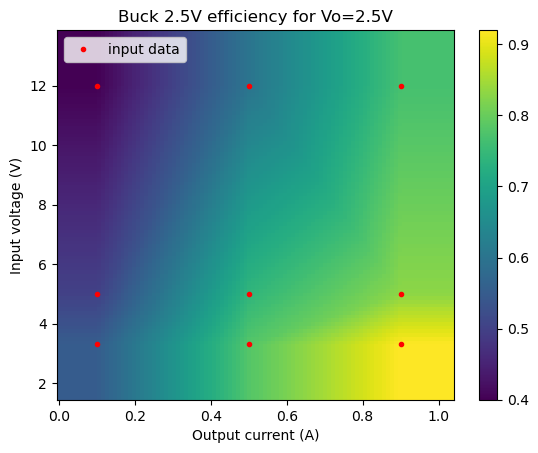

In [6]:
sys.plot_interp("Buck 2.5V");

## LinReg

In [7]:
ldo_params = """[linreg]
vo = 1.8      # output voltage (V), mandatory
vdrop = 0.25  # dropout voltage (V), optional
iis = 0.33e-6 # sleep (shut-down) current (A), optional
rt = 20.0     # thermal resistance (°C/W), optional
#ig = 1.2e-6  # ground current (A), optional
# ground current (ig) can optionally be specified as 1D interpolation data:
#[linreg.ig]
#vi = [5.0]
#io = [0.0, 0.05, 0.1]
#ig = [[2.0e-6, 0.5e-3, 0.85e-3]]
# or as 2D interpolation data:
[linreg.ig]
vi = [2.5, 5.0]
io = [0.0, 0.05, 0.1]
ig = [[1.2e-6, 0.34e-3, 0.64e-3], [2.0e-6, 0.5e-3, 0.85e-3]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 2.7, 24.0] 
vo = [ 0.0, 1000000.0]
vd = [ 0.3, 100.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 0.25]
pi = [ 0.0, 1000000.0]
po = [ 0.0, 1000000.0]
pl = [ 0.0, 0.3]
tr = [ 0.0, 5.75]
tp = [-40.0, 85.0]
"""

with open("linreg.toml", "w") as f:
    f.write(ldo_params)

sys.add_comp("Vsys", comp=LinReg.from_file("LDO 1.8V", fname="linreg.toml"))

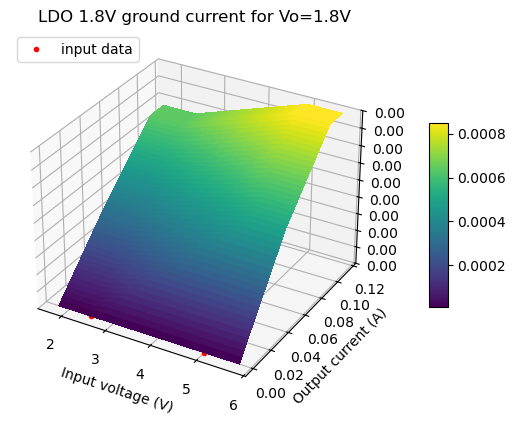

In [8]:
sys.plot_interp("LDO 1.8V", plot3d=True);

## PSwitch

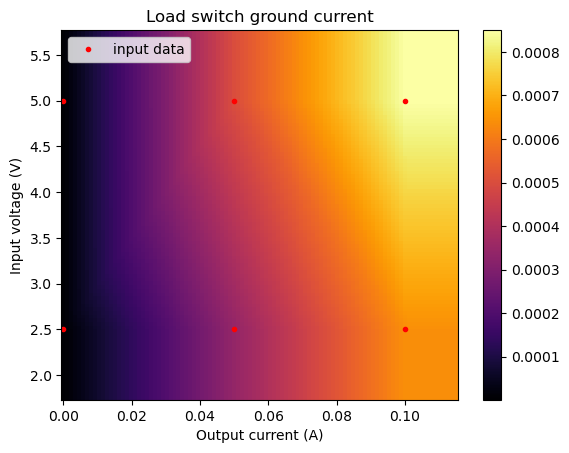

In [9]:
pswitch_params = """[pswitch]
rs = 0.1     # series resistance (Ohm), optional 
iis = 1.0e-6 # sleep mode current (A), optional
rt = 0.0     # thermal resistance (°C/W), optional
#ig = 1.2e-6 # Ground current (optional)
# ground current (ig) can optionally be specified as 1D interpolation data:
#[pswitch.ig]
#vi = [5.0]
#io = [0.0, 0.05, 0.1]
#ig = [[2.0e-6, 0.5e-3, 0.85e-3]]
# or as 2D interpolation data:
[pswitch.ig]
vi = [2.5, 5.0]
io = [0.0, 0.05, 0.1]
ig = [[1.2e-6, 0.34e-3, 0.64e-3], [2.0e-6, 0.5e-3, 0.85e-3]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 2.7, 24.0] 
vo = [ 0.0, 1000000.0]
vd = [ 0.3, 100.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 0.25]
pi = [ 0.0, 1000000.0]
po = [ 0.0, 1000000.0]
pl = [ 0.0, 0.3]
tr = [ 0.0, 5.75]
tp = [-40.0, 85.0]
"""

with open("pswitch.toml", "w") as f:
    f.write(pswitch_params)

sys.add_comp("Vsys", comp=PSwitch.from_file("Load switch", fname="pswitch.toml"))
sys.plot_interp("Load switch", cmap="inferno");

## RLoss

In [10]:
rloss_params = """[rloss]
rs = 7.5   # series resistance (Ohm), mandatory
rt = 40.0  # thermal resistance (°C/W), optional

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 1000000.0] 
vo = [ 0.0, 1000000.0]
vd = [ 0.0, 20.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1000000.0]
pi = [ 0.0, 10.0]
po = [ 0.0, 10.0]
pl = [ 0.0, 2.5]
tr = [ 0.0, 50.0]
tp = [-55.0, 55.0]
"""

with open("rloss.toml", "w") as f:
    f.write(rloss_params)

sys.add_comp("Load switch", comp=RLoss.from_file("Filter", fname="rloss.toml"))

## VLoss

In [11]:
vloss_params = """[vloss]
#vdrop = 0.33 # voltage drop (V), mandatory
rt = 25.0     # thermal resistance (°C/W), optional
# voltage drop can optionally be specified as 1D interpolation data:
[vloss.vdrop]
vi = [3.3]
io = [0.1, 0.5, 0.9]
vdrop = [[0.23, 0.41, 0.477]]
# or as 2D interpolation data:
#[vloss.vdrop]
#vi = [3.3, 5.0, 12.0]
#io = [0.1, 0.5, 0.9]
#vdrop = [[0.23, 0.34, 0.477], [0.27, 0.39, 0.51], [0.3, 0.41, 0.57]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 200.0] 
vo = [ 0.0, 1000000.0]
vd = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 0.75]
pi = [ 0.0, 1.0]
po = [ 0.0, 1.0]
pl = [ 0.0, 0.75]
tr = [ 0.0, 3.14]
tp = [-40.0, 65.0]
"""

with open("vloss.toml", "w") as f:
    f.write(vloss_params)

sys.add_comp("Buck 2.5V", comp=VLoss.from_file("Diode", fname="vloss.toml"))

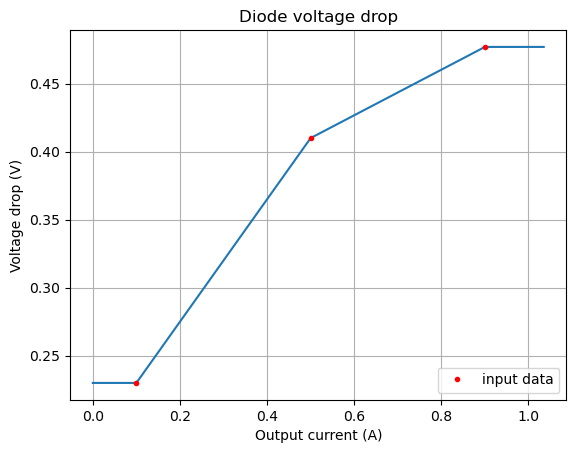

In [12]:
sys.plot_interp("Diode");

## PLoad

In [13]:
pload_params = """[pload]
pwr = 0.5    # load power (W), mandatory
pwrs = 1e-3  # sleep mode load power (W), optional
rt = 15.0    # thermal resistance (°C/W), optional
loss = false # count load as a loss (bool)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 24.0] 
ii = [ 0.0, 1.85]
tr = [ 0.0, 25.0]
tp = [-20.0, 75.0]
"""

with open("pload.toml", "w") as f:
    f.write(pload_params)

sys.add_comp("LDO 1.8V", comp=PLoad.from_file("MCU", fname="pload.toml"))

## ILoad

In [14]:
iload_params = """[iload]
ii = 0.125   # load current (A), mandatory
iis = 1e-5   # sleep mode load current (A), optional
rt = 42.0    # thermal resistance (°C/W), optional
loss = false # count load as a loss (bool)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 24.0] 
pi = [ 0.0, 1000000.0]
tr = [ 0.0, 35.0]
tp = [-40.0, 125.0]
"""

with open("iload.toml", "w") as f:
    f.write(iload_params)

sys.add_comp("Filter", comp=ILoad.from_file("Load", fname="iload.toml"))

## RLoad

In [15]:
rload_params = """[rload]
rs = 12.0   # series resistance (Ohm), mandatory
rt = 5.0    # thermal resistance (°C/W), optional
loss = true # count load as a loss (bool)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 1000000.0] 
ii = [ 0.0, 1.5]
pi = [ 0.0, 0.33]
tr = [ 0.0, 10.5]
tp = [-40.0, 105.0]
"""

with open("rload.toml", "w") as f:
    f.write(rload_params)

sys.add_comp("Diode", comp=RLoad.from_file("Resistor (loss)", fname="rload.toml"))

## Summary
All component parameters can be loaded from .toml files.

In [16]:
sys.params()

,Component,Type,vo (V),vdrop (V),rs (Ohm),rt (°C/W),eff (%),ig (A),iq (A),ii (A),iis (A),pwr (W),pwrs (W),loss
0,5V,SOURCE,5.0,,0.0,0.0,,,,,,,,
1,V3.3,SOURCE,3.3,,0.007,0.0,,,,,,,,
2,Pmux,PMUX,,,"[0.33, 0.42, 0.15]",5.3,,interp,,,0.000001,,,
3,Load switch,PSWITCH,,,0.1,0.0,,interp,,,0.000001,,,
4,Filter,SLOSS,,,7.5,40.0,,,,,,,,
5,Load,LOAD,,,,42.0,,,,0.125,0.00001,,,False
6,LDO 1.8V,LINREG,1.8,0.25,,20.0,,interp,,,0.0,,,
7,MCU,LOAD,,,,15.0,,,,,,0.5,0.001,False
8,Buck 2.5V,CONVERTER,2.5,,,25.0,interp,,0.000001,,0.0,,,
9,Diode,SLOSS,,interp,,25.0,,,,,,,,


In [17]:
sys.limits()

,Component,Type,vi limit (V),vo limit (V),vd limit (V),ii limit (A),io limit (A),pi limit (W),po limit (W),pl limit (W),tr limit (°C),tp limit (°C)
0,5V,SOURCE,,,,,,,,,,
1,V3.3,SOURCE,,,,,"[0.0, 1.0]",,,,,
2,Pmux,PMUX,"[0.0, 16.0]",,,,"[0.0, 2.0]",,,,,"[0.0, 100.0]"
3,Load switch,PSWITCH,"[2.7, 24.0]",,"[0.3, 100.0]",,"[0.0, 0.25]",,,"[0.0, 0.3]","[0.0, 5.75]","[-40.0, 85.0]"
4,Filter,SLOSS,,,"[0.0, 20.0]",,,"[0.0, 10.0]","[0.0, 10.0]","[0.0, 2.5]","[0.0, 50.0]","[-55.0, 55.0]"
5,Load,LOAD,"[0.0, 24.0]",,,,,,,,"[0.0, 35.0]","[-40.0, 125.0]"
6,LDO 1.8V,LINREG,"[2.7, 24.0]",,"[0.3, 100.0]",,"[0.0, 0.25]",,,"[0.0, 0.3]","[0.0, 5.75]","[-40.0, 85.0]"
7,MCU,LOAD,"[0.0, 24.0]",,,"[0.0, 1.85]",,,,,"[0.0, 25.0]","[-20.0, 75.0]"
8,Buck 2.5V,CONVERTER,"[2.7, 16.0]",,,,"[0.0, 1.0]",,,"[0.0, 1.0]","[0.0, 12.5]","[-40.0, 125.0]"
9,Diode,SLOSS,"[0.0, 200.0]",,,,"[0.0, 0.75]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 0.75]","[0.0, 3.14]","[-40.0, 65.0]"


In [18]:
# note: when the system contains a PMux, one tree for each source is shown
sys.tree()

Test toml
├── 5V
│   └── Pmux
│       ├── Load switch
│       │   └── Filter
│       │       └── Load
│       ├── LDO 1.8V
│       │   └── MCU
│       └── Buck 2.5V
│           └── Diode
│               └── Resistor (loss)
└── V3.3
    └── Pmux
        ├── Load switch
        │   └── Filter
        │       └── Load
        ├── LDO 1.8V
        │   └── MCU
        └── Buck 2.5V
            └── Diode
                └── Resistor (loss)

In [19]:
sys.solve()

,Component,Type,Rail in,Domain,Vin (V),Vout (V),Rail out,Iin (A),Iout (A),Power (W),Loss (W),Efficiency (%),Temp. rise (°C),Peak temp. (°C),Warnings
0,5V,SOURCE,,5V,5.0,5.0,,0.0,0.0,0.0,0.0,100.0,,,
1,V3.3,SOURCE,,V3.3,3.3,3.295407,,0.656073,0.656073,2.165042,0.003013,99.860833,,,
2,Pmux,PMUX,,V3.3,3.295407,3.078916,Vsys,0.656073,0.656035,2.162029,0.142151,93.425093,0.753402,25.753402,
3,Load switch,PSWITCH,Vsys,V3.3,3.078916,3.066416,,0.125689,0.125,0.386985,0.003683,99.048356,0.0,25.0,vd
4,Filter,SLOSS,,V3.3,3.066416,2.128918,,0.125,0.125,0.383302,0.117188,69.426848,4.6875,29.6875,
5,Load,LOAD,,V3.3,2.128918,0.0,,0.125,0.0,0.266115,0.0,100.0,11.176817,36.176817,
6,LDO 1.8V,LINREG,Vsys,V3.3,3.078916,1.8,,0.278466,0.277778,0.857375,0.357375,58.317565,7.147492,32.147492,io pl tr
7,MCU,LOAD,,V3.3,1.8,0.0,,0.277778,0.0,0.5,0.0,100.0,7.5,32.5,
8,Buck 2.5V,CONVERTER,Vsys,V3.3,3.078916,2.5,,0.25188,0.185944,0.775518,0.310659,59.941767,7.766474,32.766474,
9,Diode,SLOSS,,V3.3,2.5,2.231325,,0.185944,0.185944,0.464859,0.049958,89.253012,1.24896,26.24896,
